In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from scipy.stats import norm

# Read the dataset
data = pd.read_excel('沪深300data.xlsx')

data['日期'] = pd.to_datetime(data['日期'], format='%Y-%m-%d')
data.set_index('日期', inplace=True)





# ARMA

In [22]:
# 利用AIC或BIC选择最佳ARMA模型
best_aic = np.inf
best_order = None
for i in range(5):
    for j in range(5):
        try:
            model = ARIMA(returns, order=(i, 0, j))
            result = model.fit()
            if result.aic < best_aic:
                best_aic = result.aic
                best_order = (i, 0, j)
        except:
            continue

# 使用最佳阶数构建ARMA模型
model = ARIMA(returns, order=best_order)
result = model.fit()

# 打印模型摘要
print(result.summary())


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

                               SARIMAX Results                                
Dep. Variable:                   收盘点位   No. Observations:                 1214
Model:                          ARIMA   Log Likelihood                3541.452
Date:                Thu, 06 Apr 2023   AIC                          -7078.904
Time:                        22:40:00   BIC                          -7068.701
Sample:                             0   HQIC                         -7075.063
                               - 1214                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.326      0.744      -0.001       0.001
sigma2         0.0002   4.42e-06     38.742      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.02   Jarque-

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import norm


# 平稳性

In [8]:
def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

test_stationarity(data['收盘点位'])


ADF Statistic: -1.5575350249421425
p-value: 0.5048822312648108
Critical Values:
	1%: -3.4357480073434905
	5%: -2.863923702481129
	10%: -2.568039121778048


# ARMA建模

In [20]:
data['收盘点位_diff'] = data['收盘点位'].diff().dropna()


MissingDataError: exog contains inf or nans

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


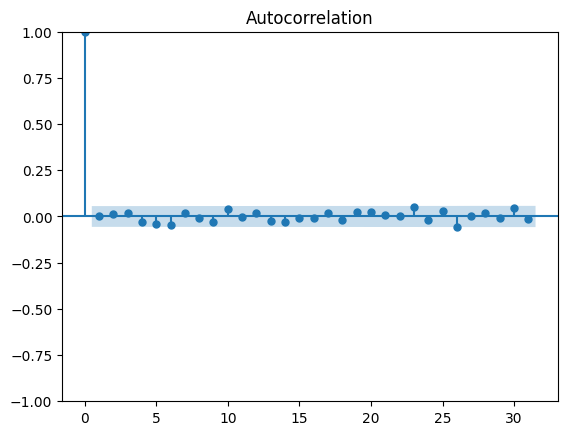

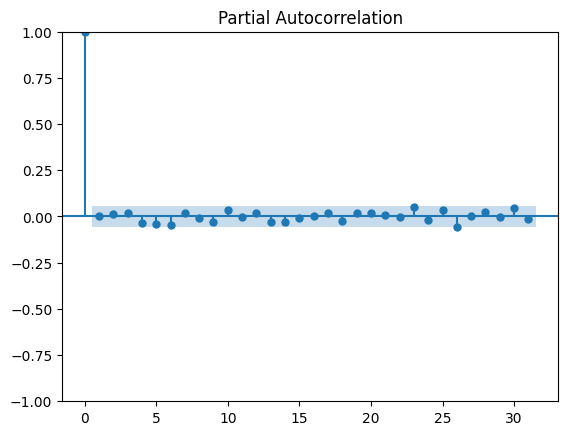

In [21]:
plot_acf(data['收盘点位_diff'].dropna())
plot_pacf(data['收盘点位_diff'].dropna())
plt.show()


In [12]:
# Replace p and q with the optimal AR and MA orders based on the ACF and PACF plots
p, q = 1, 1

model = ARIMA(data['收盘点位'], order=(p, 0, q))
results = model.fit()
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:                   收盘点位   No. Observations:                 1215
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -6575.704
Date:                Thu, 06 Apr 2023   AIC                          13159.408
Time:                        22:25:37   BIC                          13179.818
Sample:                             0   HQIC                         13167.092
                               - 1215                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4194.5423    391.844     10.705      0.000    3426.542    4962.543
ar.L1          0.9961      0.002    422.806      0.000       0.991       1.001
ma.L1          0.0058      0.025      0.235      0.8

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has bee

# VaR

In [24]:
# 设置置信水平
confidence_level = 0.95

# 计算VaR
mu = np.mean(returns)
sigma = np.std(returns)
VaR = norm.ppf(1 - confidence_level, mu, sigma)
print("VaR (Value at Risk):", VaR)
print(mu, sigma)

VaR (Value at Risk): -0.02139664967299295
0.00012999870634489087 0.013087272950380853


# 稳健性

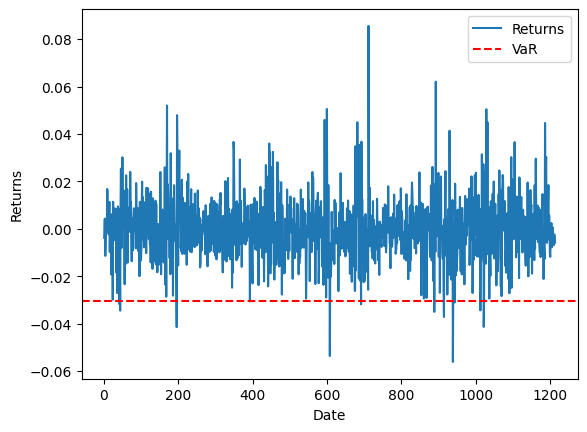

In [19]:
# 计算损失值
losses = -returns

# 计算失败天数
failures = sum(losses > VaR)

# 检测模型对收益率时间序列的分布特征拟合程度
plt.plot(returns, label="Returns")
plt.axhline(y=VaR, color="r", linestyle="--", label="VaR")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.show()


# Kupiec

In [7]:
def kupiec_test(returns, VaR, confidence_level):
    N = len(returns)
    failure_count = sum(-returns > VaR)
    pi = 1 - confidence_level
    LR_uc = -2 * (failure_count * np.log(1 - pi) + (N - failure_count) * np.log(pi))
    p_value = 1 - norm.cdf(LR_uc)

    return LR_uc, p_value

LR_uc, p_value = kupiec_test(returns, VaR, confidence_level)
print("Kupiec Test:")
print("LR_uc:", LR_uc)
print("p-value:", p_value)


Kupiec Test:
LR_uc: 254.158207959031
p-value: 0.0


# Garch

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -3494.60855097885
            Iterations: 18
            Function evaluations: 149
            Gradient evaluations: 14
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                        对数收益率   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:                3494.61
Distribution:      Standardized Student's t   AIC:                          -6979.22
Method:                  Maximum Likelihood   BIC:                          -6953.71
                                              No. Observations:                 1214
Date:                      Thu, Apr 06 2023   Df Residuals:                     1213
Time:                              22:59:23   Df Model:                            1
               

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001704. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


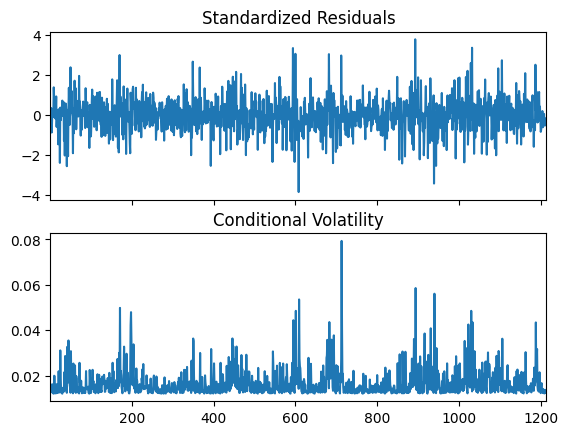

VaR 95%: 1       0.007644
2       0.006586
3       0.006494
4       0.006560
5       0.008270
          ...   
1210    0.006505
1211    0.007023
1212    0.006712
1213    0.006320
1214    0.006488
Name: cond_vol, Length: 1214, dtype: float64


In [26]:
import numpy as np
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_excel("沪深300data.xlsx")
data['收盘点位'] = data['收盘点位'].astype(float)

# 计算对数收益率
data['对数收益率'] = np.log(data['收盘点位']) - np.log(data['收盘点位'].shift(1))
data = data.dropna()

# 建立基于贝叶斯的GARCH模型
model = arch_model(data['对数收益率'], vol='Garch', p=1, q=1, dist='t')
result = model.fit(update_freq=0)

print(result.summary())

# 稳定性检验
result.plot()
plt.show()

# 回测检验
backtest = result.conditional_volatility

# 计算95% VaR值
VaR_95 = -result.params['nu'] * backtest * np.percentile(data['对数收益率'], 5)

print("VaR 95%:", VaR_95)


Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -3494.60855097885
            Iterations: 18
            Function evaluations: 149
            Gradient evaluations: 14
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                        对数收益率   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:                3494.61
Distribution:      Standardized Student's t   AIC:                          -6979.22
Method:                  Maximum Likelihood   BIC:                          -6953.71
                                              No. Observations:                 1214
Date:                      Thu, Apr 06 2023   Df Residuals:                     1213
Time:                              23:00:35   Df Model:                            1
               

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001704. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


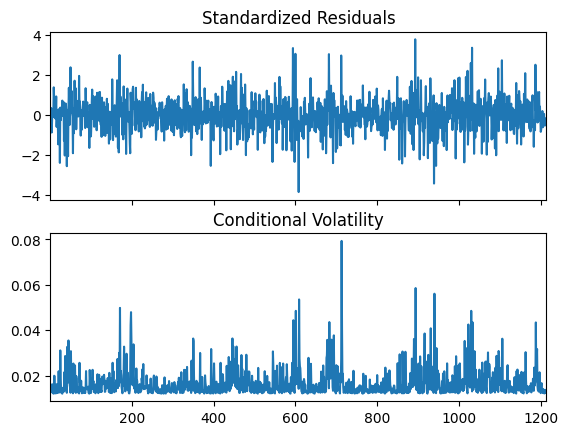

VaR 95%: 1       0.007644
2       0.006586
3       0.006494
4       0.006560
5       0.008270
          ...   
1210    0.006505
1211    0.007023
1212    0.006712
1213    0.006320
1214    0.006488
Name: cond_vol, Length: 1214, dtype: float64


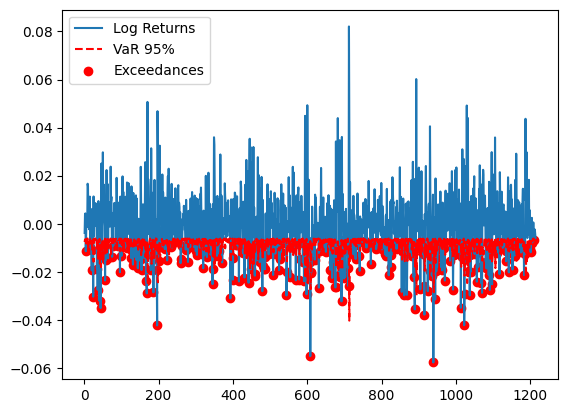

Kupiec Test:
LR_uc: 5612.974375939216
p-value: 0.0


In [27]:
import numpy as np
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt
from scipy.stats import norm

# 读取数据
data = pd.read_excel("沪深300data.xlsx")
data['收盘点位'] = data['收盘点位'].astype(float)

# 计算对数收益率
data['对数收益率'] = np.log(data['收盘点位']) - np.log(data['收盘点位'].shift(1))
data = data.dropna()

# 建立基于贝叶斯的GARCH模型
model = arch_model(data['对数收益率'], vol='Garch', p=1, q=1, dist='t')
result = model.fit(update_freq=0)

print(result.summary())

# 稳定性检验
result.plot()
plt.show()

# 回测检验
backtest = result.conditional_volatility

# 计算95% VaR值
VaR_95 = -result.params['nu'] * backtest * np.percentile(data['对数收益率'], 5)

print("VaR 95%:", VaR_95)

# 稳健性检验
exceedances = data['对数收益率'] < -VaR_95
plt.plot(data['对数收益率'], label="Log Returns")
plt.plot(data.index, -VaR_95, label="VaR 95%", linestyle="--", color='r')
plt.scatter(data.index[exceedances], data['对数收益率'][exceedances], c='red', label="Exceedances")
plt.legend()
plt.show()

# Kupiec检验
def kupiec_test(returns, VaR, confidence_level):
    N = len(returns)
    failure_count = sum(-returns > VaR)
    pi = 1 - confidence_level
    LR_uc = -2 * (failure_count * np.log(1 - pi) + (N - failure_count) * np.log(pi))
    p_value = 1 - norm.cdf(LR_uc)

    return LR_uc, p_value

LR_uc, p_value = kupiec_test(data['对数收益率'], VaR_95, 0.95)
print("Kupiec Test:")
print("LR_uc:", LR_uc)
print("p-value:", p_value)


# POT

ADF Statistic: -15.50572994655437
p-value: 2.3837789037236042e-28
Critical Values:
	1%: -3.4357748759345768
	5%: -2.8639355566269677
	10%: -2.5680454348767596
POT Model Summary:
Shape parameter (ksi): 1.332183093377345
Location parameter (mu): -0.03654140190530348
Scale parameter (sigma): 0.028306361210265252
VaR 95%: 1.0705345027253754


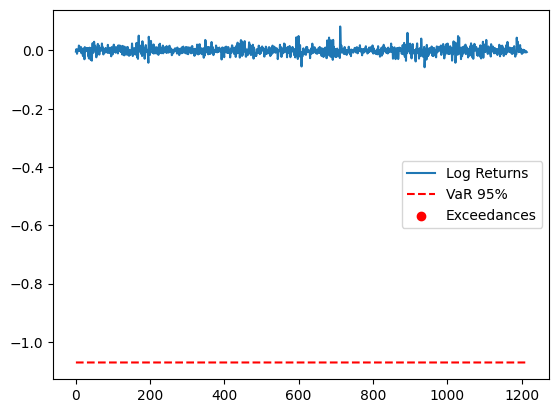

Kupiec Test:
LR_uc: 7273.637960189088
p-value: 0.0


In [28]:
import numpy as np
import pandas as pd
from scipy.stats import genpareto, norm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_excel("沪深300data.xlsx")
data['收盘点位'] = data['收盘点位'].astype(float)

# 计算对数收益率
data['对数收益率'] = np.log(data['收盘点位']) - np.log(data['收盘点位'].shift(1))
data = data.dropna()

# 平稳性检验
def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

test_stationarity(data['对数收益率'])

# 设定阈值（例如，使用收益率的95分位数）
threshold = np.percentile(data['对数收益率'], 5)

# 提取阈值以上的尖峰数据
excesses = data['对数收益率'][data['对数收益率'] < threshold] - threshold

# 拟合广义Pareto分布
params = genpareto.fit(excesses)

print("POT Model Summary:")
print("Shape parameter (ksi):", params[0])
print("Location parameter (mu):", params[1])
print("Scale parameter (sigma):", params[2])

# 计算95% VaR值
VaR_95 = threshold + genpareto.ppf(0.95, params[0], loc=params[1], scale=params[2])

print("VaR 95%:", VaR_95)

# 稳健性检验
exceedances = data['对数收益率'] < -VaR_95
plt.plot(data['对数收益率'], label="Log Returns")
plt.plot(data.index, -VaR_95 * np.ones_like(data['对数收益率']), label="VaR 95%", linestyle="--", color='r')
plt.scatter(data.index[exceedances], data['对数收益率'][exceedances], c='red', label="Exceedances")
plt.legend()
plt.show()

# Kupiec检验
def kupiec_test(returns, VaR, confidence_level):
    N = len(returns)
    failure_count = sum(-returns > VaR)
    pi = 1 - confidence_level
    LR_uc = -2 * (failure_count * np.log(1 - pi) + (N - failure_count) * np.log(pi))
    p_value = 1 - norm.cdf(LR_uc)

    return LR_uc, p_value

LR_uc, p_value = kupiec_test(data['对数收益率'], VaR_95, 0.95)
print("Kupiec Test:")
print("LR_uc:", LR_uc)
print("p-value:", p_value)


In [31]:
pip install extremefit


ERROR: Could not find a version that satisfies the requirement extremefit (from versions: none)
ERROR: No matching distribution found for extremefit
Note: you may need to restart the kernel to use updated packages.


ADF Statistic: -15.50572994655437
p-value: 2.3837789037236042e-28
Critical Values:
	1%: -3.4357748759345768
	5%: -2.8639355566269677
	10%: -2.5680454348767596
GPD Fit:
Shape:  0.5739850074772039
Loc:  8.010584183283881e-05
Scale:  0.004623487223993115
VaR 95%: -0.0209116275234624


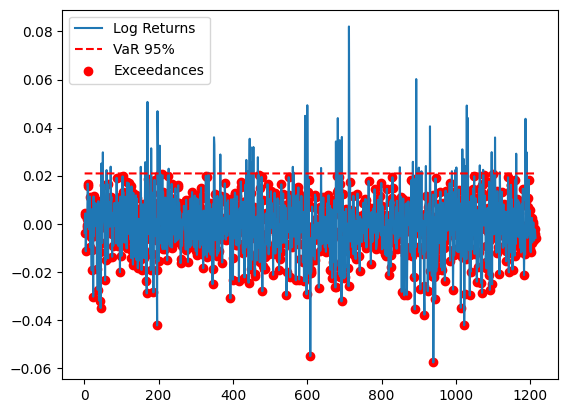

Kupiec Test:
LR_uc: 483.7616742312784
p-value: 0.0


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from scipy.stats import genpareto
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import norm

# 读取数据
data = pd.read_excel("沪深300data.xlsx")
data['收盘点位'] = data['收盘点位'].astype(float)

# 计算对数收益率
data['对数收益率'] = np.log(data['收盘点位']) - np.log(data['收盘点位'].shift(1))
data = data.dropna()

# 平稳性检验
def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

test_stationarity(data['对数收益率'])

# 构建POT模型
threshold = np.percentile(data['对数收益率'], 5)
exceedances = data['对数收益率'][data['对数收益率'] < threshold]
excess = -exceedances + threshold

# 拟合GPD分布
shape, loc, scale = genpareto.fit(excess)
print("GPD Fit:")
print("Shape: ", shape)
print("Loc: ", loc)
print("Scale: ", scale)

# 计算VaR值
confidence_level = 0.95
quantile = genpareto.ppf(1 - confidence_level, shape, loc, scale)
VaR = threshold + quantile

print("VaR 95%:", VaR)

# 稳健性检验
exceedances = data['对数收益率'] < -VaR
plt.plot(data['对数收益率'], label="Log Returns")
plt.plot(data.index, -VaR * np.ones_like(data['对数收益率']), label="VaR 95%", linestyle="--", color='r')
plt.scatter(data.index[exceedances], data['对数收益率'][exceedances], c='red', label="Exceedances")
plt.legend()
plt.show()

# Kupiec检验
def kupiec_test(returns, VaR, confidence_level):
    N = len(returns)
    failure_count = sum(-returns > VaR)
    pi = 1 - confidence_level
    LR_uc = -2 * (failure_count * np.log(1 - pi) + (N - failure_count) * np.log(pi))
    p_value = 1 - norm.cdf(LR_uc)

    return LR_uc, p_value

LR_uc, p_value = kupiec_test(data['对数收益率'], VaR, 0.95)
print("Kupiec Test:")
print("LR_uc:", LR_uc)
print("p-value:", p_value)
